# Ipywidgets GUI for the OpenPTV-Python

FileUpload(value=(), accept='image/*', description='Upload')

FileUpload(value=(), accept='image/*', description='Upload')

IntText(value=0, description='Particle 1')

IntText(value=1, description='Particle 2')

IntText(value=2, description='Particle 3')

IntText(value=3, description='Particle 4')

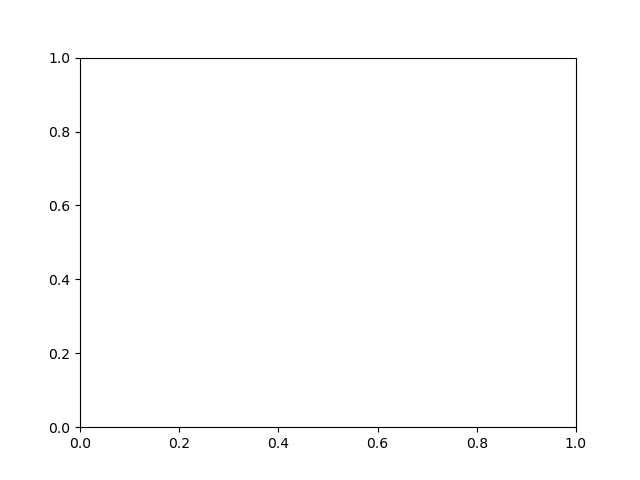

In [1]:
# Function to handle clicks on the image
import imageio as iio

# File upload widget
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib widget
# Import necessary libraries
from io import BytesIO

from IPython.display import display


# Function to load image
def load_image(change):
    global img, ax
    file_content = change["new"][0]["content"]
    img = iio.imread(BytesIO(file_content))
    ax.clear()
    ax.imshow(img, cmap="gray")
    plt.draw()


# Function to handle clicks on the image
def onclick(event):
    global clicks
    if event.inaxes != ax:
        return
    if event.button == 1:  # Left click to add point
        if len(clicks) < 4:
            clicks.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, "ro")
            plt.draw()
            if len(clicks) == 4:
                print("Clicked points:", clicks)
                calibration_data = list(zip(particle_numbers, clicks))
                print("Calibration data:", calibration_data)
    elif event.button == 3:  # Right click to remove last point
        if clicks:
            clicks.pop()
            ax.clear()
            ax.imshow(img, cmap="gray")
            for click in clicks:
                ax.plot(click[0], click[1], "ro")
            plt.draw()


file_upload = widgets.FileUpload(accept="image/*", multiple=False)
display(file_upload)
# file_upload = widgets.FileUpload(accept="image/*", multiple=False)  # type: ignore
file_upload.observe(load_image, names="value")

# Integer input widgets
particle_numbers = [
    widgets.IntText(value=i, description=f"Particle {i + 1}")
    for i in range(4)  # type: ignore
]

# Display widgets
display(file_upload)

for widget in particle_numbers:
    display(widget)

# Initialize variables
clicks = []
particle_numbers = [widget.value for widget in particle_numbers]

# Connect the click event
fig, ax = plt.subplots()
cid = fig.canvas.mpl_connect("button_press_event", onclick)
plt.show()

In [2]:
clicks, particle_numbers

([(np.float64(22.8766233766234), np.float64(28.504329004328838)),
  (np.float64(613.7857142857144), np.float64(32.83333333333326)),
  (np.float64(29.370129870129915), np.float64(623.7424242424242)),
  (np.float64(602.9632034632036), np.float64(606.4264069264069))],
 [0, 1, 2, 3])